In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
# sns.color_palette
# sns.color_palette("flare",  as_cmap=True)

%matplotlib notebook
%load_ext autoreload
%autoreload 2

df = pd.read_csv('Case_material/train/X_train.csv')
# plt.figure()
# # plt.plot(df.Madrid_tcc.to_numpy())
# plt.hist(df.Madrid_tcc.to_numpy(), 100,color='flare')
# plt.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


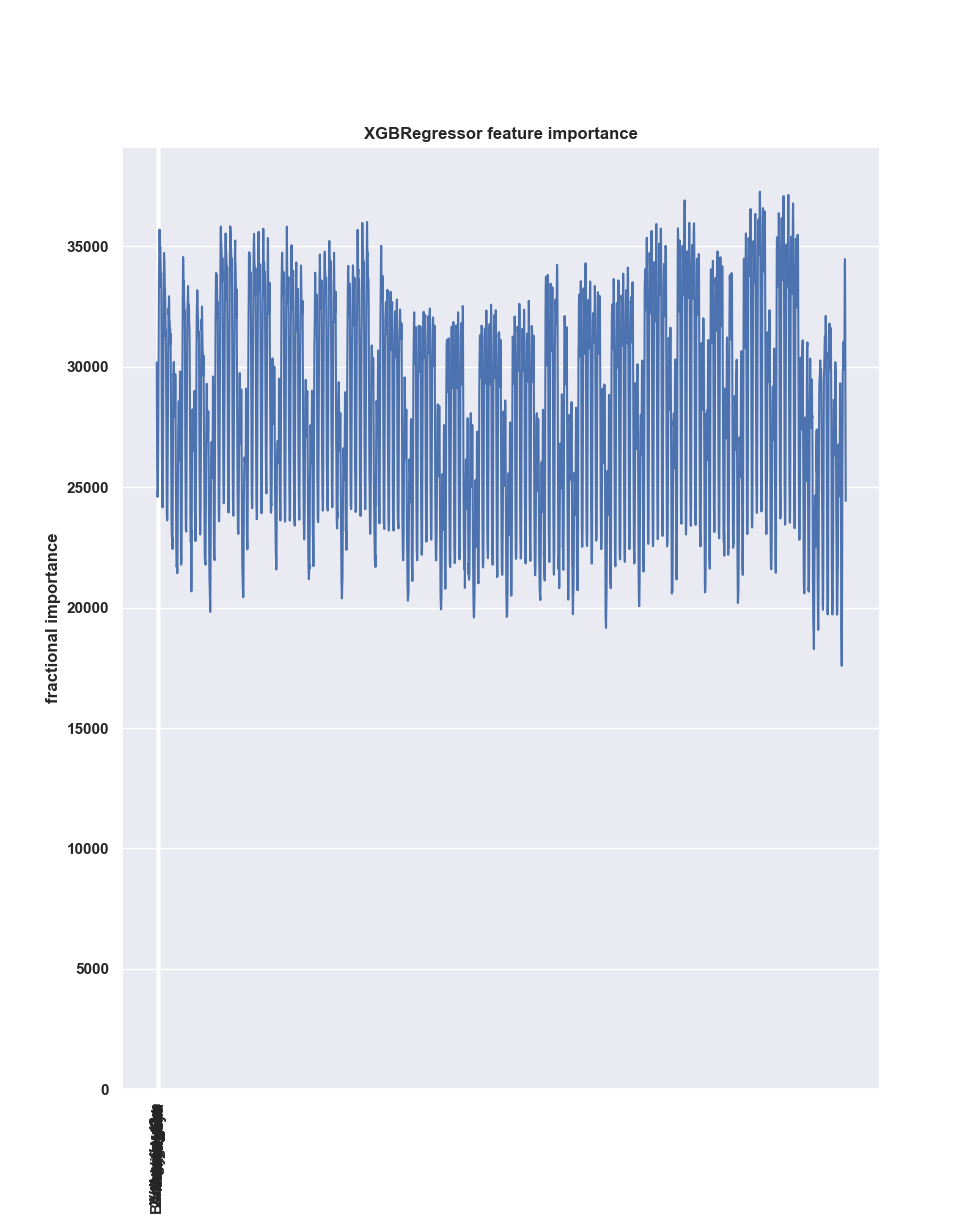

In [54]:
import numpy as n
import matplotlib.pyplot as plt

font = {
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# Random gaussian data.
idx = [1, 7, 12, 13, 19, 25, 31, 36, 37, 39, 40, 42, 43]
cols = X_train.columns[idx]
fi = fit.feature_importances_[idx]

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('plasma')
N = len(cols)
x = np.arange(N).astype(float)

# Plot histogram.
# n, bins, patches = plt.hist(df.Madrid_tcc.to_numpy(), 30, color='green')
plt.bar(cols,fi, color=cm(x/N))

plt.title('XGBRegressor feature importance',  fontweight='bold')
plt.ylabel('fractional importance',  fontweight='bold')
# plt.xlabel('Total cloud coverage', fontsize='large', fontweight='bold')
plt.xticks(rotation=90);
# scale values to interval [0,1]
plt.show()

In [40]:

X_train.columns[idx]
fit.feature_importance_[idx]

AttributeError: 'XGBRegressor' object has no attribute 'feature_importance_'

In [27]:
df.Madrid_tcc.value_counts()

0.000000    5341
1.000000    1894
0.000149     144
0.000522     126
0.000922      95
            ... 
0.879484       1
0.064577       1
0.287038       1
0.164009       1
0.044447       1
Name: Madrid_tcc, Length: 24749, dtype: int64

/Users/osvaldfrisk/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


[0]	validation_0-rmse:25025.30469	validation_1-rmse:24865.50781
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 25 rounds.
[1]	validation_0-rmse:21576.21680	validation_1-rmse:21455.27930
[2]	validation_0-rmse:18606.37305	validation_1-rmse:18519.07422
[3]	validation_0-rmse:16049.11426	validation_1-rmse:15988.95117
[4]	validation_0-rmse:13848.57910	validation_1-rmse:13814.55957
[5]	validation_0-rmse:11954.17871	validation_1-rmse:11959.50195
[6]	validation_0-rmse:10324.16113	validation_1-rmse:10352.54981
[7]	validation_0-rmse:8921.96387	validation_1-rmse:8992.01856
[8]	validation_0-rmse:7716.30127	validation_1-rmse:7801.01025
[9]	validation_0-rmse:6679.33154	validation_1-rmse:6788.25635
[10]	validation_0-rmse:5789.41895	validation_1-rmse:5918.15381
[11]	validation_0-rmse:5026.54688	validation_1-rmse:5168.57373
[12]	validation_0-rmse:4372.64307	validation_1-rmse:4533.03369
[13]	validation_0-

[130]	validation_0-rmse:432.35190	validation_1-rmse:894.85999
[131]	validation_0-rmse:430.20441	validation_1-rmse:894.32275
[132]	validation_0-rmse:429.40625	validation_1-rmse:893.89319
[133]	validation_0-rmse:427.27387	validation_1-rmse:892.59436
[134]	validation_0-rmse:426.06552	validation_1-rmse:891.85346
[135]	validation_0-rmse:424.66824	validation_1-rmse:891.97028
[136]	validation_0-rmse:420.88236	validation_1-rmse:890.95258
[137]	validation_0-rmse:419.10477	validation_1-rmse:889.40405
[138]	validation_0-rmse:418.65179	validation_1-rmse:889.16846
[139]	validation_0-rmse:418.16995	validation_1-rmse:889.86377
[140]	validation_0-rmse:416.93362	validation_1-rmse:889.53009
[141]	validation_0-rmse:415.70242	validation_1-rmse:888.94727
[142]	validation_0-rmse:414.26276	validation_1-rmse:889.00909
[143]	validation_0-rmse:413.31943	validation_1-rmse:889.28308
[144]	validation_0-rmse:410.24326	validation_1-rmse:888.94067
[145]	validation_0-rmse:408.39700	validation_1-rmse:888.49103
[146]	va

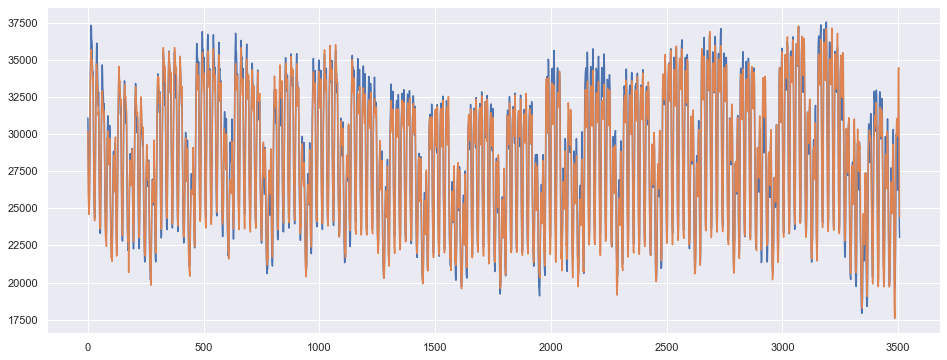

In [2]:
from src.pipelines import *
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBRFRegressor, DMatrix, cv
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import numpy as np
from scipy.stats import uniform, loguniform, randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X_TRAIN_PATH = '../Case_material/train/X_train.csv'
Y_TRAIN_PATH = '../Case_material/train/y_train.csv'

X = pd.read_csv(X_TRAIN_PATH)
y = pd.read_csv(Y_TRAIN_PATH)

add_time(X)
add_hour_dayofweek_month(X)
# add_hour_batches(X)
# add_weekend(X)
# add_business_hour(X)
# add_siesta(X)
add_holidays_spain(X)
# before_holidays_spain(X)
# add_city_weight(X)
# normalize(X)
# print(X.columns)
# exit()
# cols2drop = ['time', 'ValueDateTimeUTC', 'Madrid_d2m', 'Madrid_t2m', 'Madrid_i10fg',
#              'Madrid_sp', 'Madrid_tcc', 'Madrid_tp', 'Barcelona_d2m',
#              'Barcelona_t2m', 'Barcelona_i10fg', 'Barcelona_sp', 'Barcelona_tcc',
#              'Barcelona_tp', 'Valencia_d2m', 'Valencia_t2m', 'Valencia_i10fg',
#              'Valencia_sp', 'Valencia_tcc', 'Valencia_tp', 'Seville_d2m',
#              'Seville_t2m', 'Seville_i10fg', 'Seville_sp', 'Seville_tcc',
#              'Seville_tp', 'Zaragoza_d2m', 'Zaragoza_t2m', 'Zaragoza_i10fg',
#              'Zaragoza_sp', 'Zaragoza_tcc', 'Zaragoza_tp', 'Malaga_d2m',
#              'Malaga_t2m', 'Malaga_i10fg', 'Malaga_sp', 'Malaga_tcc', 'Malaga_tp',
#              'date']
# X.drop(columns=cols2drop, inplace=True)
holidays = X.holidays[X.holidays == 1]
X.drop(columns=['ValueDateTimeUTC', 'time', 'date'], inplace=True)
y.drop(columns=['ValueDateTimeUTC'], inplace=True)

split_frac = 0.9
X_train = X[:int(X.shape[0]*split_frac)]
X_test = X[int(X.shape[0]*split_frac):]
y_train = y[:int(X.shape[0]*split_frac)]
y_test = y[int(X.shape[0]*split_frac):]

n_estimators = 2000
params = {
    # Parameters that we are going to tune.
    'learning_rate': 0.13872832647046318,
    'max_depth': 7,
    # Other parameters
    'objective': 'reg:squarederror'
}

xgb_model = XGBRegressor(
    **params,
    n_estimators=n_estimators)

split_frac = 0.9
X_train = X[:int(X.shape[0]*split_frac)]
X_test = X[int(X.shape[0]*split_frac):]
y_train = y[:int(X.shape[0]*split_frac)]
y_test = y[int(X.shape[0]*split_frac):]


fit = xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=25)


test_preds = xgb_model.predict(X_test)

print('MSE:', round(mean_squared_error(y_test.to_numpy(),
                                       test_preds.reshape((-1, 1))), 2))
print('R^2:', round(r2_score(y_test.to_numpy(), test_preds.reshape((-1, 1))), 2))

mape = np.mean(np.abs((y_test.to_numpy() - test_preds.reshape((-1, 1))) /
                      np.abs(y_test.to_numpy())))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

plt.figure(figsize=(16, 6))
plt.plot(y_test.to_numpy())
plt.plot(test_preds)
plt.show()


<IPython.core.display.Javascript object>


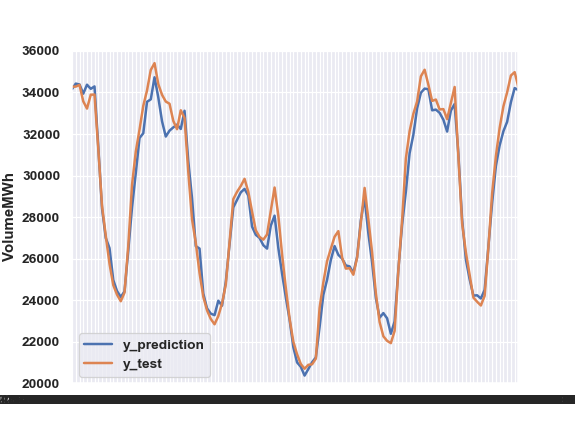

(20000, 36000)

In [99]:
fig, ax = plt.subplots(1,1)

ax.plot(time, test_preds[880:1000], label='y_prediction', linewidth=2)
ax.plot(y_test.to_numpy()[880:1000], label='y_test', linewidth=2)
plt.ylabel('VolumeMWh', fontweight='bold')
ax.legend()
ax.set_xlim(0, 119)
ax.set_ylim(20000, 36000)


In [80]:
y

,VolumeMWh
0,24376.238696
1,22812.428588
2,21331.618480
3,20346.208372
4,20000.498264
...,...
35059,29569.588516
35060,27507.286688
35061,25272.484860
35062,23771.083036


In [97]:
time = df.ValueDateTimeUTC.loc[881:1000]

In [101]:
import datetime
x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in time]

ValueError: time data '2015-02-06 17:00:00+00:00' does not match format '%m/%d/%Y'

In [90]:
test_preds.shape

(3507,)